In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

In [2]:
###Load dataset
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
###Eliminate empty string values in totals column change to float
string_bool = df['TotalCharges'] > " "
df = df[string_bool]
df[['TotalCharges']] = df[['TotalCharges']].astype('float64')

In [6]:
df['senior_citizen'] = ['Yes' if x == 1 else 'No' for x in df['SeniorCitizen']]

In [7]:
#drop SC and ID
df.drop('SeniorCitizen', axis = 1, inplace = True)
df.drop('customerID', axis = 1, inplace = True)

In [8]:
##TotalCharges to float64, SeniorCitizen categorical?Binary?
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [9]:
online_features = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies']

In [10]:
df['internet_service'] = ['No' if i == 'No' else 'Yes' for i in df.InternetService]

In [11]:

for i in df.columns:
    if df[i].dtype.kind not in 'biufc':
        print('{}: {}' .format(i, df[i].unique()))
        if 'No internet service' in df[i].unique():
            df[i] = [1 if x == 'Yes' else 0 for x in df[i]]
        elif len(df[i].unique()) == 2:
            t_df = pd.get_dummies(df[i], prefix = i,  drop_first = True)
            df[t_df.columns.values] = t_df
            df.drop(i, axis = 1, inplace = True)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']
senior_citizen: ['No' 'Yes']
internet_service: ['Yes' 'No']


In [12]:
df['multiple_lines'] = [1 if x == 'Yes' else 0 for x in df["MultipleLines"]]
df.drop('MultipleLines', axis = 1, inplace = True)

In [13]:
df.head()

,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,...,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_Yes,senior_citizen_Yes,internet_service_Yes,multiple_lines
0,1,DSL,0,1,0,0,0,0,Month-to-month,Electronic check,...,29.85,0,1,0,0,1,0,0,1,0
1,34,DSL,1,0,1,0,0,0,One year,Mailed check,...,1889.50,1,0,0,1,0,0,0,1,0
2,2,DSL,1,1,0,0,0,0,Month-to-month,Mailed check,...,108.15,1,0,0,1,1,1,0,1,0
3,45,DSL,1,0,1,1,0,0,One year,Bank transfer (automatic),...,1840.75,1,0,0,0,0,0,0,1,0
4,2,Fiber optic,0,0,0,0,0,0,Month-to-month,Electronic check,...,151.65,0,0,0,1,1,1,0,1,0


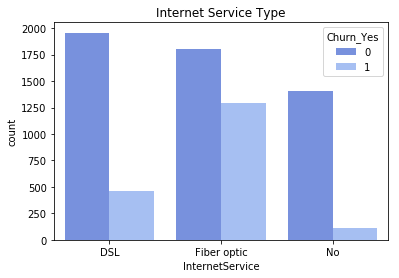

In [14]:
plt.title('Internet Service Type')
sns.countplot(x=df['InternetService'], hue = df['Churn_Yes'], palette = sns.color_palette('coolwarm'));

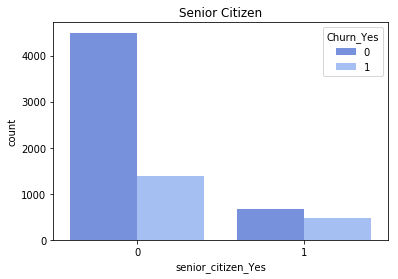

In [15]:
plt.title('Senior Citizen')
sns.countplot(x=df['senior_citizen_Yes'], hue = df['Churn_Yes'], palette = sns.color_palette('coolwarm'));

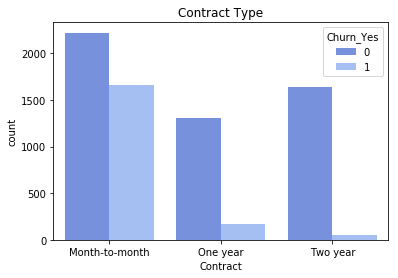

In [16]:
plt.title('Contract Type')
sns.countplot(x=df['Contract'], hue = df['Churn_Yes'], palette = sns.color_palette('coolwarm'));

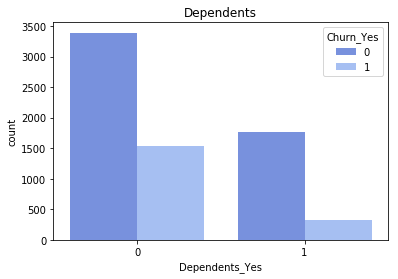

In [17]:
plt.title('Dependents')
sns.countplot(x=df['Dependents_Yes'], hue = df['Churn_Yes'], palette = sns.color_palette('coolwarm'));

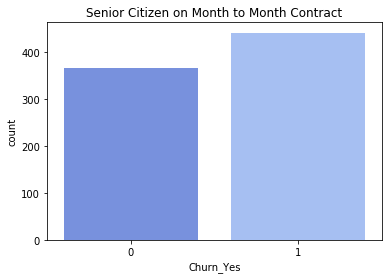

In [18]:
plt.title('Senior Citizen on Month to Month Contract')
sns.countplot(data = df.query('senior_citizen_Yes == 1 and Contract == "Month-to-month"'), x = 'Churn_Yes',
             palette = sns.color_palette('coolwarm'));

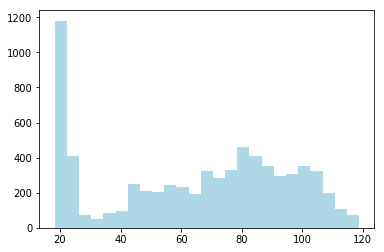

In [19]:
plt.hist(df['MonthlyCharges'], color = 'lightblue', bins = 25);

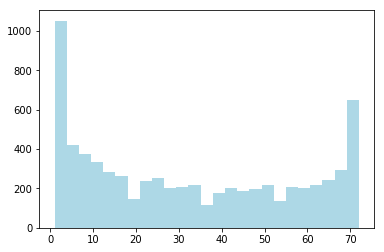

In [20]:
plt.hist(df['tenure'], color = 'lightblue', bins = 25);

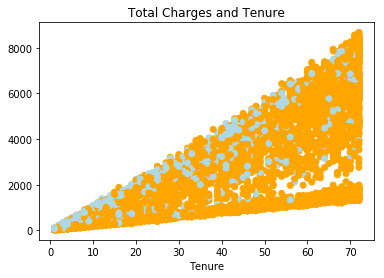

In [21]:
plt.title('Total Charges and Tenure')
plt.xlabel('Tenure')
plt.scatter(df.tenure, df.TotalCharges, color = ['orange' if i == 0 else 'lightblue' for i in df.Churn_Yes]);

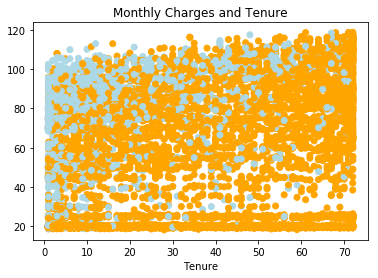

In [22]:
plt.title('Monthly Charges and Tenure')
plt.xlabel('Tenure')
plt.scatter(df.tenure, df.MonthlyCharges, color = ['orange' if i == 0 else 'lightblue' for i in df.Churn_Yes]);

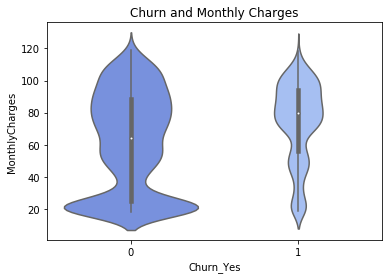

In [23]:
plt.title('Churn and Monthly Charges')
ax = sns.violinplot(x=df.Churn_Yes, y=df.MonthlyCharges, scale = 'count', palette = sns.color_palette('coolwarm'));

In [24]:
df.head()

,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,...,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_Yes,senior_citizen_Yes,internet_service_Yes,multiple_lines
0,1,DSL,0,1,0,0,0,0,Month-to-month,Electronic check,...,29.85,0,1,0,0,1,0,0,1,0
1,34,DSL,1,0,1,0,0,0,One year,Mailed check,...,1889.50,1,0,0,1,0,0,0,1,0
2,2,DSL,1,1,0,0,0,0,Month-to-month,Mailed check,...,108.15,1,0,0,1,1,1,0,1,0
3,45,DSL,1,0,1,1,0,0,One year,Bank transfer (automatic),...,1840.75,1,0,0,0,0,0,0,1,0
4,2,Fiber optic,0,0,0,0,0,0,Month-to-month,Electronic check,...,151.65,0,0,0,1,1,1,0,1,0


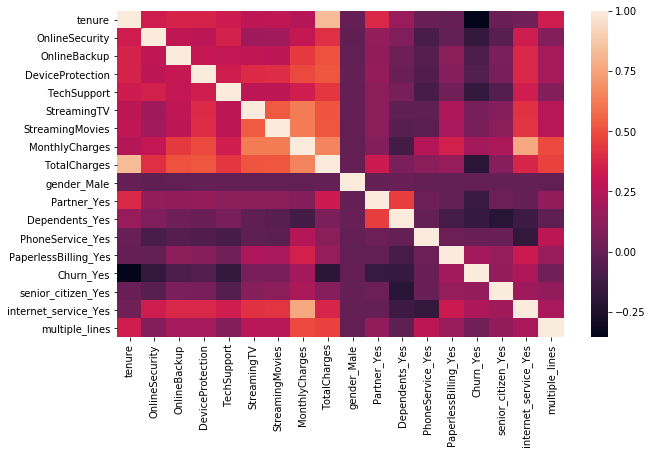

In [25]:
#corr = df_features.corr()
corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr);

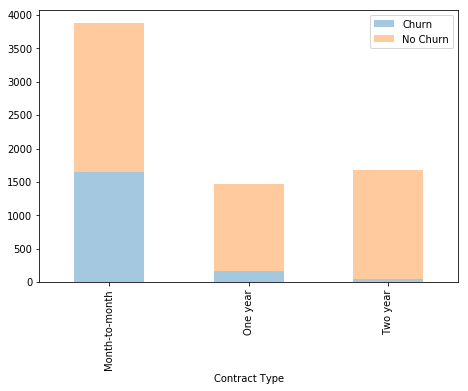

In [26]:
month_month = df.query('Contract == "Month-to-month"')['Churn_Yes'].value_counts()
year_1 = df.query('Contract == "One year"')['Churn_Yes'].value_counts()
year_2 = df.query('Contract == "Two year"')['Churn_Yes'].value_counts()

X_AXIS = (df.Contract.unique())

index = pd.Index(X_AXIS, name = 'Contract Type')

month_month[0], year_1[0], year_2[0]

data = {
    'No Churn': (month_month[0], year_1[0], year_2[0]),
    'Churn': (month_month[1], year_1[1], year_2[1])
}

c_df = pd.DataFrame(data, index=index)
ax = c_df.plot(kind='bar', stacked=True, figsize=(7.5, 5), alpha =.4)
plt.show()

In [27]:
bins = pd.IntervalIndex.from_tuples([(0, 31), (31,66), (66, np.max(df['MonthlyCharges']))])
df['MonthlyCharges'] = pd.cut(df['MonthlyCharges'], bins, labels=["low", "medium", "high"])
df['MonthlyCharges'] = df['MonthlyCharges'].cat.codes

In [28]:
#Explore some measure of "value" 
online_feature_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                  'StreamingTV', 'StreamingMovies', 'multiple_lines']
df['features_sum'] = df[online_feature_cols].sum(axis=1)

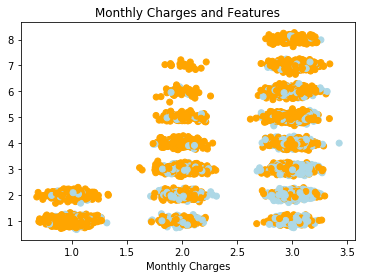

In [29]:
def jitter(values):
    return values + np.random.normal(1,0.1,values.shape)
plt.title('Monthly Charges and Features')
plt.xlabel('Monthly Charges')
plt.scatter(jitter(df.MonthlyCharges), jitter(df.features_sum), color = ['orange' if i == 0 else 'lightblue' for i in df.Churn_Yes]);